Linear Algebra, NumPy, Statistics

![NumPy](https://numpy.org/doc/stable/_static/numpylogo.svg)

### Installing NumPy

``pip install numpy`` or ``conda install numpy`` depending on your setup.

``!pip install numpy`` in notebooks.

### Importing NumPy

In [56]:
import numpy as np
import random
from typing import List
from numpy import ndarray
import matplotlib.pyplot as plt

# For Later
np.random.seed(1234)
random.seed(1234)

### Lists vs NumPy Arrays - Why bother?

* A Python list can contain different data types within a single list, a NumPy Array can **NOT**.
* NumPy arrays are faster and more compact than Python lists.
* An array consumes less memory and is convenient to use.

### Creating Arrays

Let's start by creating an array.

$$
\begin{bmatrix}
	1 & 2 & 3 \\
	4 & 5 & 6 \\
	7 & 8 & 9 \\
\end{bmatrix}
% \quad
$$

Pass a list to ``np.array()``. Simple as that!

In [57]:
nums = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
np_nums = np.array(nums)

np_nums

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Other Array creation functions: ``np.array()``,`` np.zeros()``, ``np.ones()``, ``np.empty()``,``np.arange()``, ``np.linspace()``, play around with them!

Some examples below:


In [58]:
np_ones = np.ones([2, 2])
np_ones

array([[1., 1.],
       [1., 1.]])

In [59]:
np_zeros = np.zeros([5, 5], dtype=np.int64)
np_zeros

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

Notice `np_zeros` has no decimal point after the numbers, since we specified `dtype=np.int64`

### Reshaping Arrays [``np.reshape()``](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)

Gives a new shape to an array without changing its data.

`np_nums` is $3\times3$, what if we want it to be a 1D array?

In [60]:
nums_1d = np.reshape(np_nums, (1, 9))
nums_1d

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

What about $9\times1$?

In [61]:
nums_1d_other = np.reshape(np_nums, (9, 1))
nums_1d_other

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

Now make it 3D?

In [62]:
nums_3d = np.reshape(np_nums, (3, 1, 3))
nums_3d

array([[[1, 2, 3]],

       [[4, 5, 6]],

       [[7, 8, 9]]])

In [63]:
nums_3d.shape

(3, 1, 3)

### Lowering Dimensionality

`nums_3d` is 3D, what would this look like in 1D?

In [64]:
flattened = nums_3d.flatten()
flattened

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [65]:
flattened.shape

(9,)

### Indexing

![NumPy Indexing](https://numpy.org/doc/stable/_images/np_indexing.png)


What if we want to select from an array based on conditions? ex. $n>5$

In [66]:
many_nums = np.arange(45)

In [67]:
big_nums = many_nums[many_nums > 5]
big_nums

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44])

In [68]:
evens = many_nums[many_nums % 2 == 0]
evens

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44])

### Matrix Multiplication

In [69]:
EX_SIZE = (2, 2)
arr1 = np.random.randint(5, size=EX_SIZE)
arr2 = np.random.randint(5, size=EX_SIZE)

In [70]:
arr1

array([[3, 4],
       [4, 0]])

In [71]:
arr2

array([[1, 1],
       [1, 2]])

In [72]:
arr3 = np.matmul(arr1, arr2)
arr3

array([[ 7, 11],
       [ 4,  4]])

In [73]:
arr4 = np.matmul(arr2, arr1)
arr4

array([[ 7,  4],
       [11,  4]])

So, is this really faster?

Cheating here in `matrix_mult()`, not checking if matrices can be multiplied etc, but we're just passing valid matrices only for demo.

In [74]:
def matrix_mult(A: List[List[int]], B: List[List[int]]):
    rows_A, cols_A = len(A), len(A[0])
    rows_B, cols_B = len(B), len(B[0])

    # Making an empty matrix.
    result = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]
    return result

In [75]:
EX_SIZE = (100, 100)
arr1 = np.random.randint(5, size=EX_SIZE)
arr2 = np.random.randint(5, size=EX_SIZE)
list1 = arr1.tolist()
list2 = arr2.tolist()

In [76]:
%timeit matrix_mult(list1, list2)

136 ms ± 19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [77]:
%timeit np.matmul(arr1, arr2)

779 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Using `%timeit` magic, we can see that `np.matmul()` is significantly faster, and scales with larger matrices.

#### Broadcasting

How does NumPy deal with arrays of different shapes during arithmetic ops?

In [78]:
a = np.array([1, 2, 3])
b = np.array([2, 2, 2])
c = 2

$a \times b$ is a valid operation.

In [79]:
a * b

array([2, 4, 6])

In [80]:
a * c

array([2, 4, 6])

$c$ is not a `ndarray`, it is just a scalar, but numpy can "stretch" this scalar into `a.shape` to perform the multiplication.

![](https://numpy.org/doc/stable/_images/broadcasting_1.png)

##### What can we broadcast?


```
A      (2d array):  5 x 4
B      (1d array):      1
Result (2d array):  5 x 4
```
B is a single element, and that can be stretched to $5\times4$

```
A      (2d array):  5 x 4
B      (1d array):      4
Result (2d array):  5 x 4
```
B's trailing dimension matches A's trailing dimension.


```
A      (1d array):  3
B      (1d array):  4
```

The trailing dimensions here don't match. You can't broadcast a 3 element array into a 4 element array, or vice versa.

```
A      (3d array):  15 x 3 x 5
B      (3d array):  15 x 1 x 5
Result (3d array):  15 x 3 x 5
```

```
A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 5
Result (3d array):  15 x 3 x 5
```

```
A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 1
Result (3d array):  15 x 3 x 5
```


```
A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3
```
Here, the second from last dimensions mismatched. If A was $4\times1$, we can broadcast, but the $2\times1$ can't be broadcast into $4\times3$.

![](https://numpy.org/doc/stable/_images/broadcasting_2.png)

In [81]:
a = np.array(
    [
        [0.0, 0.0, 0.0],
        [10.0, 10.0, 10.0],
        [20.0, 20.0, 20.0],
        [30.0, 30.0, 30.0],
    ]
)

b = np.array([1.0, 2.0, 3.0])
c = np.array([1.0, 2.0, 3.0, 4.0])

In [82]:
print(a.shape, b.shape, c.shape)
a * b

(4, 3) (3,) (4,)


array([[ 0.,  0.,  0.],
       [10., 20., 30.],
       [20., 40., 60.],
       [30., 60., 90.]])

In [83]:
# Will cause a ValueError
# a * c

Stretching in two dimensions.

This is a more advanced example of broadcasting, but cool nonetheless.

In [84]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])

Let's start by turning `A (4,)` to a `(4,1)` array, by using `a[:,np.newaxis]`.

![](https://numpy.org/doc/stable/_images/broadcasting_4.png)

In [85]:
a[:, np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

## Statistics and Data Summary

A lot of these functions can be implemented manually with relative ease within the python stdlib, or the `statistics` module.

We're going to use ``scipy``'s ``stats`` module in addition to ``numpy``.

![](https://docs.scipy.org/doc/scipy/_static/logo.svg)

``pip install scipy`` or ``conda install scipy`` depending on your setup.

``!pip install scipy`` in notebooks.

### Measures of Central Tendency

* Mean
* Median
* Mode

##### Quantile (Percentile)
* represents the value less than which a certain percentile of the data lies.
    - Median reperesents the value less than which 50% of the data lies
    - Median is the 50th quantile


In [86]:
import scipy

stats_array = np.random.random(10)

In [87]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]


big_list = list(range(1000))

print(
    f"40th quantile of 1000 -> {quantile(big_list,.40)}, 40% of samples are less than this value."
)
print(
    f"99th quantile of 1000 -> {quantile(big_list,.99)}, 99% of samples are less than this value."
)

40th quantile of 1000 -> 400, 40% of samples are less than this value.
99th quantile of 1000 -> 990, 99% of samples are less than this value.


### Dispersion Measures

How spread out is the data?


#### Range

Pretty basic -> max-min

#### Variance

Measure of the deviation from the mean.

In [88]:
np.var(stats_array)

0.087751746011365

#### Covariance

Like variance, this time with two variables.

How do two variables vary *in tandem* from their means?


Lets create some arrays from equations, add some random noise and graph them.

In [89]:
# No Noise
x_noise = np.zeros(100)
y_noise = np.zeros(100)

# Random Noise.
# x_noise = np.random.normal(0, 10, 100)
# y_noise = np.random.normal(0, 10, 100)

x = np.add(np.arange(0, 100, 1), x_noise)
y1 = np.add(np.arange(0, 100, 1), y_noise)
y2 = np.add(np.arange(100, 0, -1), y_noise)

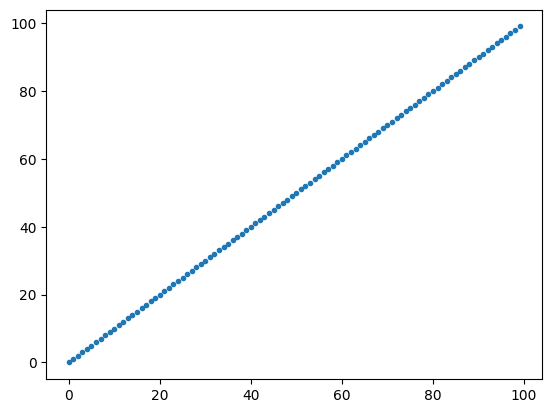

array([[841.66666667, 841.66666667],
       [841.66666667, 841.66666667]])

In [90]:
plt.scatter(x, y1, marker=".")
plt.show()

np.cov(x, y1)

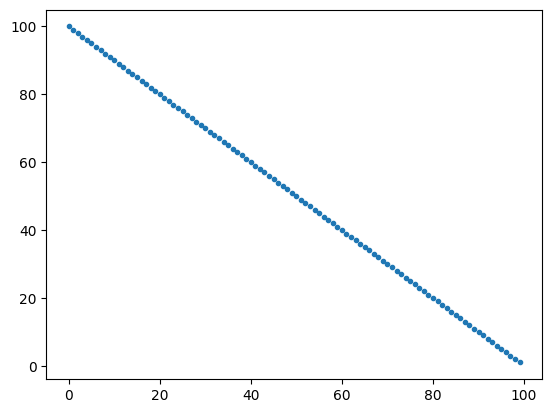

array([[ 841.66666667, -841.66666667],
       [-841.66666667,  841.66666667]])

In [91]:
plt.scatter(x, y2, marker=".")
plt.show()

np.cov(x, y2)

In [92]:
x_random = np.random.normal(0, 5, 100)
y_random = np.random.normal(0, 5, 100)

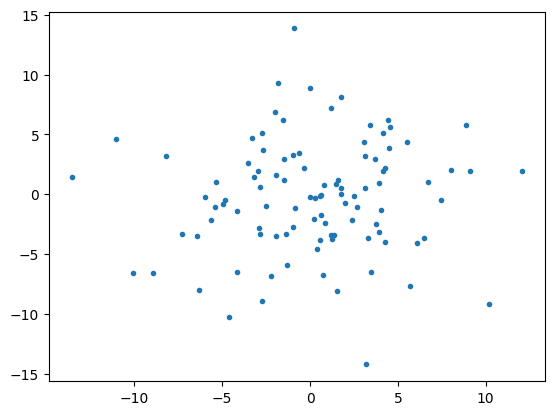

In [93]:
plt.scatter(x_random, y_random, marker=".")

In [94]:
np.cov(x_random, y_random)

array([[21.1400641 ,  1.61371687],
       [ 1.61371687, 22.00412722]])

#### Question 1

Start by creating a random interger numpy array, of dimensions 3,3

In [108]:
SIZE = (3, 3)
rand_3x3 = np.random.randint(30, size=SIZE)

Check that you did it correctly by printing the shape of the array.

In [109]:
#print(f"Shape of rand_3x3: {rand_3x3}")
print(rand_3x3)

[[21  7 25]
 [ 4 20 19]
 [ 8 15 13]]


Now create another random array. You can decide the shape/size.

Note: No empty arrays, or extremely small arrays. $ > 10 $ elements. Thanks.

In [110]:
SIZE = (6, 4)
random_array = np.random.randint(10, size=SIZE)
print(random_array)

[[5 3 8 9]
 [1 7 2 3]
 [2 5 1 7]
 [8 5 0 7]
 [2 2 0 6]
 [5 8 0 6]]


Turn this into a 2D array.

In [111]:
arr_2d = np.reshape(random_array, (2, 12))
print(arr_2d)

[[5 3 8 9 1 7 2 3 2 5 1 7]
 [8 5 0 7 2 2 0 6 5 8 0 6]]


Turn this into a 4D array.

In [112]:
arr_4d = np.reshape(arr_2d, (4, 6))
print(arr_4d)

[[5 3 8 9 1 7]
 [2 3 2 5 1 7]
 [8 5 0 7 2 2]
 [0 6 5 8 0 6]]


Turn the 4D array into a 1D array.

In [113]:
arr_1d = np.reshape(arr_4d, (1, 24))
print(arr_1d)

[[5 3 8 9 1 7 2 3 2 5 1 7 8 5 0 7 2 2 0 6 5 8 0 6]]


Use boolean indexing on `num_array` to return an array of squares. The output array should contain the elements from the input array whose square root is a whole number. __DO NOT__ use loops, that beats the point of this exercise.

Ex:
- Input: $[0, 1, 5, 6, 4, 81]$
- Output: $[0,1,4,81]$

- perfect squares: $\sqrt{0}$ = 0, $\sqrt{1}$ = 1, $\sqrt{4}$ = 2, $\sqrt{81}$=9


Hint - $\sqrt{x}$ is the same as $x^{0.5}$

In [114]:
num_array = np.array(
    [
        [
            [
                [[3, 47, 5], [31, 58, 49]],
                [[25, 9, 55], [96, 56, 65]],
                [[55, 7, 7], [29, 29, 50]],
                [[16, 74, 18], [50, 73, 36]],
            ],
            [
                [[9, 8, 88], [91, 63, 46]],
                [[85, 82, 89], [21, 54, 88]],
                [[45, 86, 51], [78, 13, 68]],
                [[28, 31, 23], [0, 20, 64]],
            ],
        ]
    ]
)

In [103]:
whole_squares = num_array[np.sqrt(num_array) % 1 == 0]
print(whole_squares)

[49 25  9 16 36  9  0 64]


Now do the same for `rand_3x3`, which you defined above.

In [115]:
squares_3x3 = rand_3x3[np.sqrt(rand_3x3) % 1 == 0]
print(squares_3x3)

[25  4]


#### Question 2

# Covariance between two variables


Generate two random variables, with 100-200 elements, using any distribution of your choice.
Plot a scatter plot of the two variables, and calculate the correlation using the following functions.

Hint: Reading documentation is important.

- [`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)
- [`scipy.stats.spearmanr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)
- [`numpy.corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)


[[3536.50618753 3395.64617585]
 [3395.64617585 3465.09457281]]
[[ 1. -1.]
 [-1.  1.]]
[[1.         0.97001327]
 [0.97001327 1.        ]]


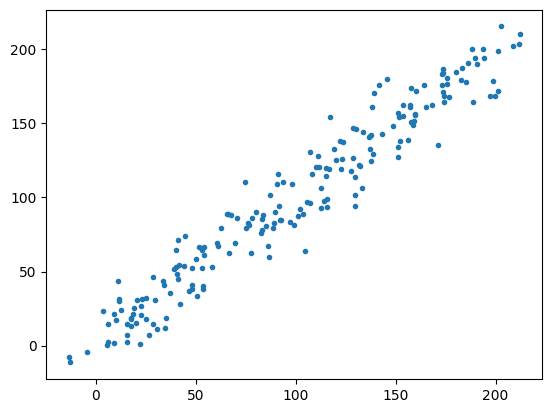

In [159]:
from scipy.stats import pearsonr

x = np.random.normal(0, 10, 200)
y = np.random.normal(0, 10, 200)

x_random = np.add(np.arange(0, 200, 1), x)
y_random = np.add(np.arange(0, 200, 1), y)

plt.scatter(x_random, y_random, marker=".")

cov_array = np.cov(x_random, y_random)
print(cov_array)

cov_corr_array = np.corrcoef(cov_array)
print(cov_corr_array)

corrcoef_array = np.corrcoef(x_random, y_random)
print(corrcoef_array)

Compare your three answers. What do you observe?

What which of the two formulas does `numpy.corrcoef` use?


In [144]:
# TODO Your answer below

my_answer = """

[[3536.50618753 3395.64617585]
 [3395.64617585 3465.09457281]]   :::::   covariance matrix
[[ 1. -1.]
 [-1.  1.]]        :::::   correlation coefficient matrix of covariance matrix
[[1.         0.97001327]
 [0.97001327 1.        ]] :::::   correlation coefficient matrix of x and y vars

 - for the values of the covariance matrix, we can observe the values are not clear,
 they seem to be
 - observing the three answers, we can see right away that the values of R of the
 correlation coefficient matrix of the covariance matrix are between -1 and 1
 - also, similarly with the correlation coefficient matrix of the x and y variables,
 the values are between -1 and 1

numpy.corrcoef uses the formula for computing the covariance matrix, and
uses that to determine the relationship between the correlation coefficient
matrix. The covariance matrix compares how much and which variables vary.
This is the formula for the covariance matrix: Cij, is the covariance of xi
and xj. Cii is the variance of xi. This is the formula for the correlation
coefficient matrix: Rij = Cij / sqrt(Cii Cjj)
            """

print(my_answer)



[[ 89.92561797   6.7952679 ]
 [  6.7952679  128.58919039]]   :::::   covariance matrix 
[[ 1. -1.]           
 [-1.  1.]]        :::::   correlation coefficient matrix of covariance matrix
[[1.         0.06319208]
 [0.06319208 1.        ]] :::::   correlation coefficient matrix of x and y vars

 - for the values of the covariance matrix, we can observe that they are within 
 the given range, between 10 and 200
 - observing the three answers, we can see right away that the values of R of the 
 correlation coefficient matrix of the covariance matrix are between -1 and 1
 - also, similarly with the correlation coefficient matrix of the x and y variables, 
 the values are between -1 and 1

numpy.corrcoef uses the formula for computing the covariance matrix, and 
uses that to determine the relationship between the correlation coefficient 
matrix. The covariance matrix compares how much and which variables vary. 
This is the formula for the covariance matrix: Cij, is the covariance of xi 
